In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, cross_validate

/Users/ritumutaka/.conda/envs/Categorical_Feature_Encoding_Challenge_II/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
pd.set_option('display.max_columns', 100)
DATA_FOLDER_PATH = "/Users/ritumutaka/J/Categorical_Feature_Encoding_Challenge_II/datas/cat-in-the-dat-ii"
RANDOM_STATE = 2020

sample_submission = pd.read_csv(DATA_FOLDER_PATH + "/sample_submission.csv", index_col=0)

train_X = pd.read_csv(DATA_FOLDER_PATH + "/train_X_TargetEncoded.csv", index_col=0)
test_X = pd.read_csv(DATA_FOLDER_PATH + "/test_X_TargetEncoded.csv", index_col=0)

print('data loaded')

load data


In [6]:
train_X['target'] = 0
test_X['target'] = 1

train_AdversarialValidation = pd.concat([train_X, test_X])
train_AdversarialValidation.reset_index(drop=True, inplace=True)
train_AdversarialValidation_X = train_AdversarialValidation.drop(['target'], axis=1)
train_AdversarialValidation_y = train_AdversarialValidation['target']
print('made train_AdversarialValidation')

make train_AdversarialValidation


In [11]:
%%time
print('Adversarial Validation')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# tree_model = lgb.LGBMClassifier()

# skf_scores = cross_validate(tree_model, train_AdversarialValidation_X, train_AdversarialValidation_y, cv=skf)
for tr_idx, oof_idx in skf.split(train_AdversarialValidation_X, train_AdversarialValidation_y):
    tree_model = lgb.LGBMClassifier()
    tree_model.fit(train_AdversarialValidation_X.iloc[tr_idx, :], train_AdversarialValidation_y.iloc[tr_idx])
    importance = pd.DataFrame(
        tree_model.feature_importances_, index=train_AdversarialValidation_X.columns, columns=['importance'])
    print(
        'oof score:',
        tree_model.score(train_AdversarialValidation_X.iloc[oof_idx, :], train_AdversarialValidation_y.iloc[oof_idx]))
    break
    

Adversarial Validation
oof score: 1.0
CPU times: user 25.4 s, sys: 795 ms, total: 26.2 s
Wall time: 8.4 s


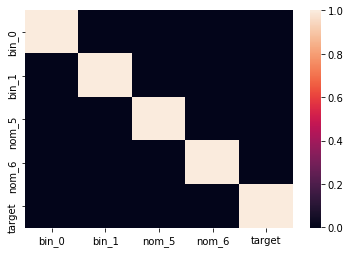

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train_AdversarialValidation.loc[:, ['bin_0', 'bin_1', 'nom_5', 'nom_6', 'target']].corr())
plt.show()


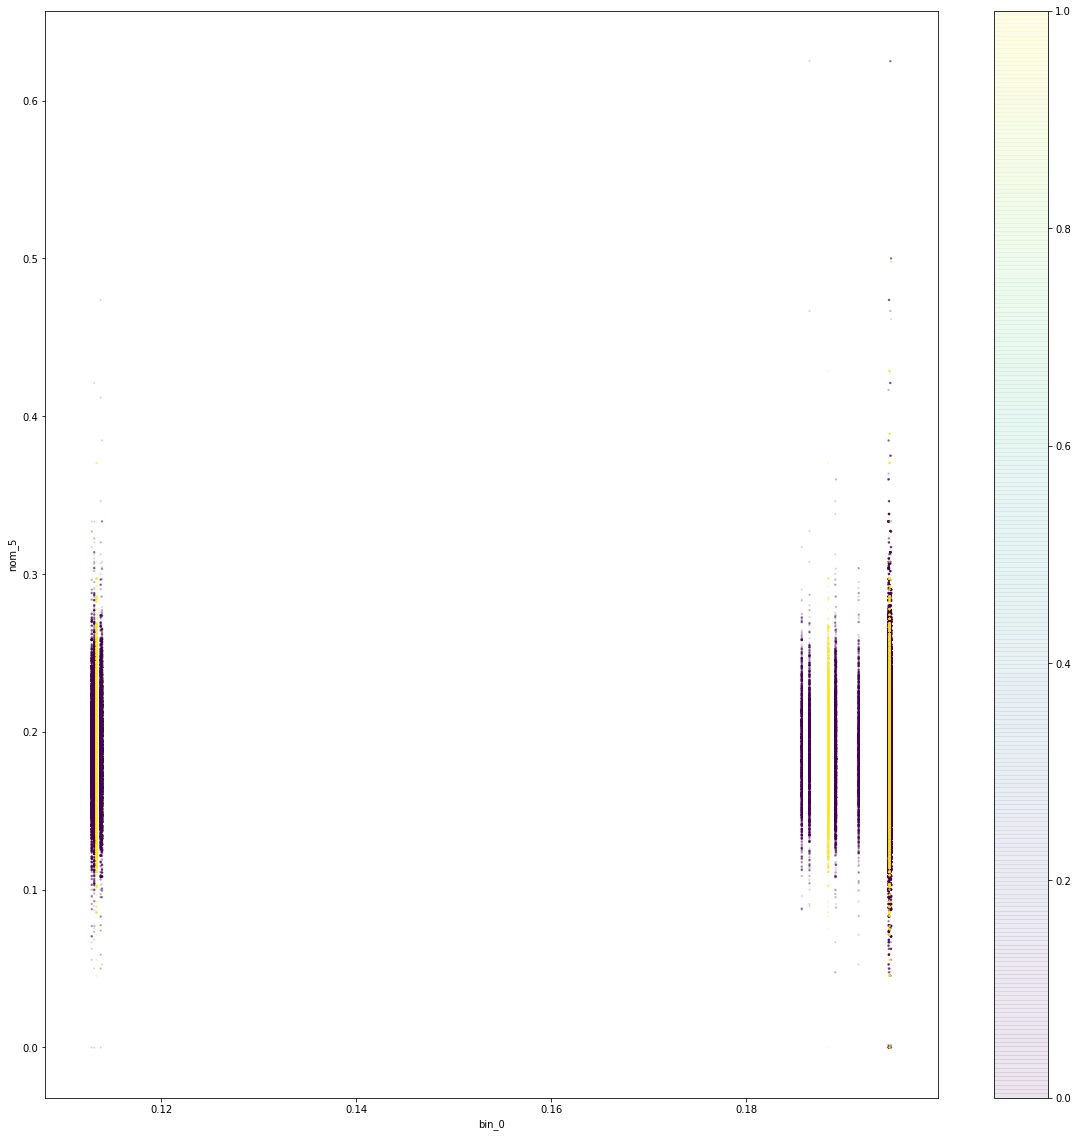

In [31]:
import numpy as np

plt.figure(figsize=(20, 20), facecolor='gray')
plt.scatter(
    x=train_AdversarialValidation['bin_0'], 
    y=train_AdversarialValidation['nom_5'], 
    s=2,
    c=np.array(train_AdversarialValidation['target']),
    alpha=0.1,  # 透明度
)
plt.xlabel('bin_0')
plt.ylabel('nom_5')
plt.colorbar()
plt.show()

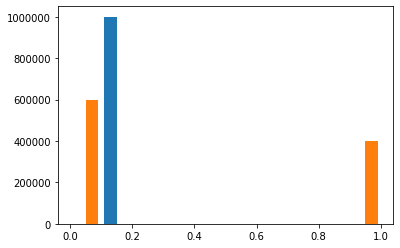

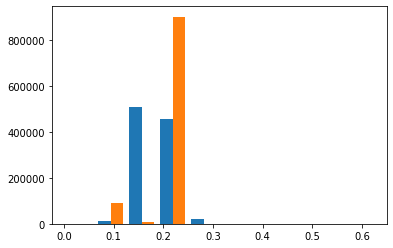

In [26]:
plt.hist([train_AdversarialValidation['bin_0'], train_AdversarialValidation['target']])
plt.show()

plt.hist([train_AdversarialValidation['nom_5'], train_AdversarialValidation['bin_0']])
plt.show()

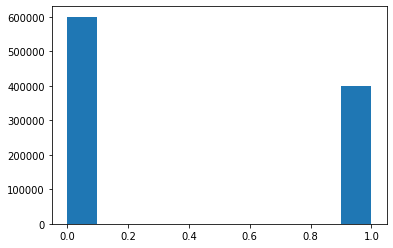

In [27]:
plt.hist([train_AdversarialValidation['target']])
plt.show()
